## Investigating magma properties and changes during fractional crystallization
- This is an example that was developed for EPS 114  - Advanced Volcanology at Berkeley by P. Wieser
- It allows students to look at what affects viscosity, and also what controls different fractional crystallization pathways

In [1]:
## If you are running on victor - you will need to pip install PetThermoTools here
%pip install PetThermoTools

# If you alrady have it installed, time to upgrade
#%pip install --upgrade PetThermoTools

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Check the version
import petthermotools as ptt
ptt.__version__

alphaMELTS for Python files successfully located.


'0.3.20'

## Install Thermobar
- This notebook uses Thermobar to calculate viscosity. If you have not yet installed Thermobar, please do so here

In [ ]:
# Uncomment if you need to install
%pip install Thermobar 

In [3]:
import Thermobar as pt
pt.__version__

'1.0.68'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If the alphaMELTS for Python files have not been added to your Python path (see installation guide) then use the two lines below to add
# the location of the alphaMELTS files here.
# import sys
# sys.path.append(r'C:\Users\penny\Box\Berkeley_new\MELTS_Installation\alphamelts_py\alphamelts-py-2.3.1-win64')

import Thermobar as pt

In [ ]:
# Should be used to suppress outputs on MacOS or Linux- run this cell twice if on a Mac, on VICTOR, or on Linux. 
# If you run it on windows, nothing will happen
import platform
if platform.system() == "Darwin" or platform.system() == "Linux":
    import sys
    import os
    sys.stdout = open(os.devnull, 'w')
    sys.stderr = open(os.devnull, 'w')

In [ ]:
# This specifies a bulk composition for a basalt
basalt = {'SiO2_Liq': 48.82,
       'TiO2_Liq': 1.45,
       'Al2O3_Liq': 13.46,
       'FeOt_Liq': 12.79,
       'MgO_Liq': 7.32,
       'CaO_Liq': 11.84,
       'Na2O_Liq':1.87,
       'K2O_Liq': 0.17,
       'H2O_Liq': 0,
       'MnO_Liq': 0, 
       'P2O5_Liq': 0, 
       'Fe3Fet_Liq': 0.1}

# This specifies a bulk composition for a rhyolite
rhy = {'SiO2_Liq': 77.6,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.3,
       'FeOt_Liq': 0.65,
       'MgO_Liq': 0.02,
       'CaO_Liq': 0.41,
       'Na2O_Liq': 4.49,
       'K2O_Liq': 4.69,
       'H2O_Liq': 0,
        'MnO_Liq': 0, 
       'P2O5_Liq': 0,
       'Fe3Fet_Liq': 0.1}


## Part 1 - Lets investigate things that change viscosity

### Basalt calculations

In [8]:
basalt_df = pd.DataFrame([basalt])
Viscosity_basalt=pt.calculate_viscosity_giordano_2008(liq_comps=basalt_df,  T_K=1150+273.15, H2O_Liq=0, F2O_content=0)
Viscosity_basalt


Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b12,b13,c1,c2,c3,c4,c5,c6,c11,T_K
0,103.620463,2.015446,1423.15,-4.55,5242.523032,624.647749,48.82,1.45,13.46,12.79,...,-114.308975,303.507819,142.735441,150.792602,191.142247,137.570831,-25.103977,-0.0,27.510605,1423.15


### Rhyolite Calculations

In [15]:
rhy_df = pd.DataFrame([rhy])
Viscosity_rhy=pt.calculate_viscosity_giordano_2008(liq_comps=rhy_df,  T_K=1150+273.15, H2O_Liq=0, F2O_content=0)
Viscosity_rhy


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,783172.182239,5.893857,1423.15,-4.55,11874.557577,286.160352,77.6,0.09,12.3,0.65,...,1078.148547,228.790808,123.300873,5.114944,4.803981,-96.771705,-0.0,20.92145,1423.15,5.893857


## Part 2 - Lets look at what phases stabilize in different magmas as a function of composition, and with fractional crystallization

### 2a-d - lets find the liquidus for a given composition and different conditions

In [11]:
Liq=ptt.findLiq_multi(Model='MELTSv1.2.0', bulk=basalt, T_initial_C=np.array([1200]), P_bar=np.array([1000]),
                     H2O_Liq=0, fO2_buffer=None)
Liq

  0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\penny\anaconda3\Lib\site-packages\petthermotools\Liq.py:1214: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'plagioclase1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index,:] = Res
c:\Users\penny\anaconda3\Lib\site-packages\petthermotools\Liq.py:1214: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index,:] = Res


,T_Liq_C,liquidus_phase,fluid_saturated,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,1199.7,plagioclase1,No,49.95971,1.484155,13.77016,0.0,13.090457,0.0,7.492422,12.115595,1.913508,0.173993,0.0,0.0,0.0,0.099944


In [12]:
Liq=ptt.findLiq_multi(Model='MELTSv1.2.0', bulk=basalt, T_initial_C=np.array([1200]), P_bar=np.array([6000]),
                     H2O_Liq=0, fO2_buffer=None)
Liq

  0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\penny\anaconda3\Lib\site-packages\petthermotools\Liq.py:1214: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'clinopyroxene1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index,:] = Res
c:\Users\penny\anaconda3\Lib\site-packages\petthermotools\Liq.py:1214: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Results.loc[index,:] = Res


,T_Liq_C,liquidus_phase,fluid_saturated,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,1285.5,clinopyroxene1,No,49.958869,1.484321,13.777673,0.0,13.089365,0.0,7.487014,12.114439,1.914285,0.174034,0.0,0.0,0.0,0.099931


### 2e - Do the same for the rhyolite

In [15]:
# Enter code here for rhyolite

### 2f- lets calculate the phases 60C below the liquidus

In [23]:
dict=ptt.equilibrate_multi(Model='MELTSv1.2.0', bulk=basalt, T_C=1200-60, 
                         P_bar=1000, H2O_init=0.0001, fO2_buffer=None)
# This outputs a dictionary with the keys dict_keys(['Conditions', 'liquid1', 'liquid1_prop', 'clinopyroxene1', 'clinopyroxene1_prop', 'clinopyroxene2', 'clinopyroxene2_prop', 'plagioclase1', 'plagioclase1_prop', 'All', 'PhaseList', 'mass_g', 'volume_cm3', 'rho_kg/m3', 'Affinity'])
dict['PhaseList'] # this tells you the phases that exist. 

0    Liq,Cpx,Cpx2,Plag
dtype: object

In [19]:
dict.keys()

dict_keys(['Conditions', 'liquid1', 'liquid1_prop', 'clinopyroxene1', 'clinopyroxene1_prop', 'clinopyroxene2', 'clinopyroxene2_prop', 'plagioclase1', 'plagioclase1_prop', 'All', 'PhaseList', 'mass_g', 'volume_cm3', 'rho_kg/m3', 'Affinity'])

In [ ]:
dict['Conditions']

### 2g - Lets calculate the viscosity for this new system

In [25]:
Viscosity_lowT=pt.calculate_viscosity_giordano_2008(liq_comps=dict['liquid1'],  T_K=dict['All']['T_C']+273.15, 
                                               H2O_Liq=0.0001, F2O_content=0)
Viscosity_lowT

Water content from input overridden


,n_melt,logn_melt,T_K,A,B,C,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,...,b13,c1,c2,c3,c4,c5,c6,c11,T_K,logn_melt
0,174.119236,2.240847,1413.15,-4.55,5288.675357,634.355315,46.156124,4.019724,9.705905,0.0,...,208.336083,135.239694,146.441389,237.197749,112.77517,-23.84544,-0.035251,26.582004,1413.15,2.240847


In [ ]:
# Calculate the viscosity at the liquidus to compare

## Part 3 - Lets investigate phase stability as a function of Fe3/FeT

In [14]:
# Lets define an Aleutian starting composition
Aleutian = {'SiO2_Liq': 50.04,
       'TiO2_Liq': 0.81,
       'Al2O3_Liq': 15.01,
       'FeOt_Liq': 9.62,
       'MnO_Liq': 0.16,
       'MgO_Liq': 7.28,
       'CaO_Liq': 11.52,
       'Na2O_Liq': 2.54,
       'K2O_Liq': 0.30,
       'P2O5_Liq': 0.06}

# Lets perform a fractional crystallization calculation at fO2 -1, 0, 1 and 2.

Isobaric_Xtal_fo2 = ptt.isobaric_crystallisation(Model = "MELTSv1.2.0",
                                           bulk = Aleutian,
                                           find_liquidus = True,
                                           P_bar = 2000,
                                           H2O_init=0.5,
                                           T_end_C = 900,
                                           dt_C = 5,
                                           fO2_buffer = "FMQ",
                                           fO2_offset = np.array([-1, 0, 1, 2]),
                                           Frac_solid = True,
                                           Frac_fluid = False,
                                           label = "fO2_offset")

A default timeout of 5 minutes has been specified. If you are not getting any results try increasing this using the timeout kwarg.
Completed 100.0 %


In [ ]:
# Demonstrate that the dictionary has Keys that show the calcs run at different fo2s
Isobaric_Xtal_fo2.keys()

dict_keys(['fO2 = FMQ -1.0', 'fO2 = FMQ 0.0', 'fO2 = FMQ 1.0', 'fO2 = FMQ 2.0'])

In [ ]:
# Show that within this subsample, there are more keys that hold variables. All contains all the columns you would want. 
Isobaric_Xtal_fo2['fO2 = FMQ -1.0'].keys()

dict_keys(['Conditions', 'liquid1', 'liquid1_prop', 'clinopyroxene1', 'clinopyroxene1_prop', 'plagioclase1', 'plagioclase1_prop', 'olivine1', 'olivine1_prop', 'clinopyroxene2', 'clinopyroxene2_prop', 'spinel1', 'spinel1_prop', 'All', 'PhaseList', 'mass_g', 'volume_cm3', 'rho_kg/m3', 'Input'])

In [ ]:
# We can also look at the phases for FMQ-1 at each step in the calculation. So get Plag after 5C of cooling. 
Isobaric_Xtal_fo2['fO2 = FMQ -1.0']['PhaseList']

0                  Liq,Cpx
1             Liq,Cpx,Plag
2             Liq,Cpx,Plag
3             Liq,Cpx,Plag
4             Liq,Cpx,Plag
5             Liq,Cpx,Plag
6          Liq,Cpx,Plag,Ol
7          Liq,Cpx,Plag,Ol
8          Liq,Cpx,Plag,Ol
9        Liq,Cpx,Plag,Cpx2
10       Liq,Cpx,Plag,Cpx2
11       Liq,Cpx,Plag,Cpx2
12       Liq,Cpx,Plag,Cpx2
13       Liq,Cpx,Plag,Cpx2
14       Liq,Cpx,Plag,Cpx2
15       Liq,Cpx,Plag,Cpx2
16       Liq,Cpx,Plag,Cpx2
17       Liq,Cpx,Plag,Cpx2
18       Liq,Cpx,Plag,Cpx2
19       Liq,Cpx,Plag,Cpx2
20       Liq,Cpx,Plag,Cpx2
21       Liq,Cpx,Plag,Cpx2
22    Liq,Cpx,Plag,Ol,Cpx2
23      Liq,Cpx,Plag,Ol,Sp
24      Liq,Cpx,Plag,Ol,Sp
25      Liq,Cpx,Plag,Ol,Sp
26      Liq,Cpx,Plag,Ol,Sp
27      Liq,Cpx,Plag,Ol,Sp
28      Liq,Cpx,Plag,Ol,Sp
29      Liq,Cpx,Plag,Ol,Sp
30      Liq,Cpx,Plag,Ol,Sp
31      Liq,Cpx,Plag,Ol,Sp
32      Liq,Cpx,Plag,Ol,Sp
33      Liq,Cpx,Plag,Ol,Sp
34      Liq,Cpx,Plag,Ol,Sp
35      Liq,Cpx,Plag,Ol,Sp
36      Liq,Cpx,Plag,Ol,Sp
3

(<Figure size 960x900 with 9 Axes>,
 array([[<Axes: xlabel='MgO', ylabel='SiO$_2$'>,
         <Axes: xlabel='MgO', ylabel='TiO$_2$'>,
         <Axes: xlabel='MgO', ylabel='Al$_2$O$_3$'>],
        [<Axes: xlabel='MgO', ylabel='FeO$_t$'>,
         <Axes: xlabel='MgO', ylabel='CaO'>,
         <Axes: xlabel='MgO', ylabel='Na$_2$O'>],
        [<Axes: xlabel='MgO', ylabel='K$_2$O'>, <Axes: >, <Axes: >]],
       dtype=object))

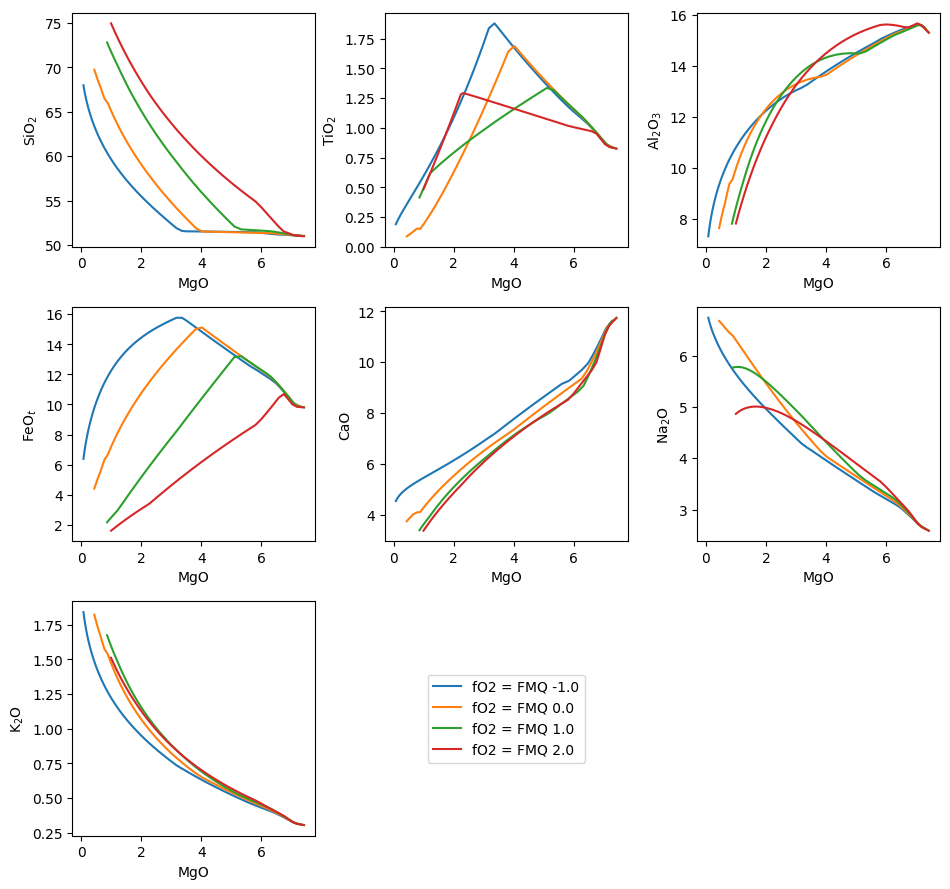

In [28]:
# Lets plot a Harker diagram of the results to compare
ptt.harker(Results = Isobaric_Xtal_fo2, legend = [1,2])

### Why is SiO2 changing so much in the different models? Lets look at the phases stabilized?

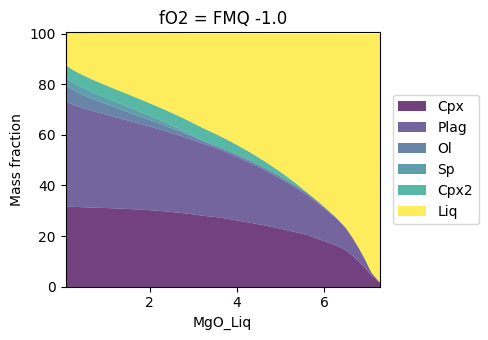

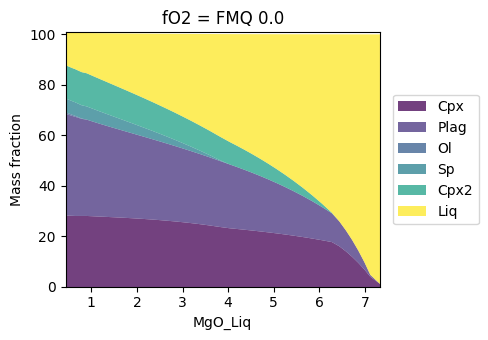

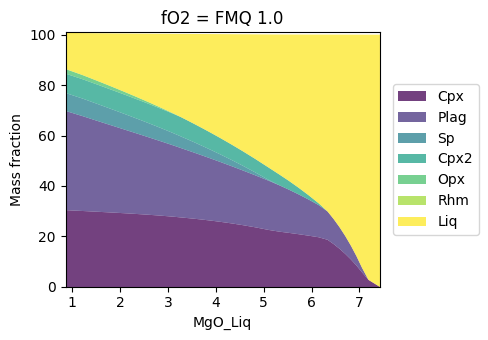

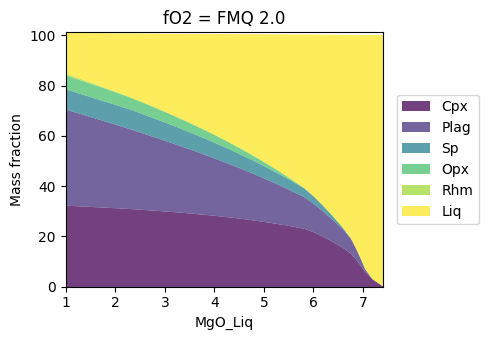

In [29]:
f, a = ptt.phase_plot(Isobaric_Xtal_fo2, x_axis = 'MgO_Liq', 
                       cmap = "viridis")

## Or another one looking at minerals in each run

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='MgO_Liq', ylabel='Mass (g) of spinel'>)

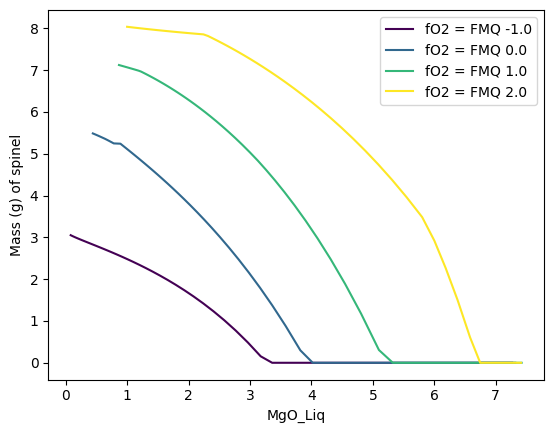

In [ ]:
ptt.phase_mass_comparison(Results=Isobaric_Xtal_fo2, x_axis="MgO_Liq", cmap = "viridis", phase = "plagioclase1")

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='MgO_Liq', ylabel='Mass (g) of spinel'>)

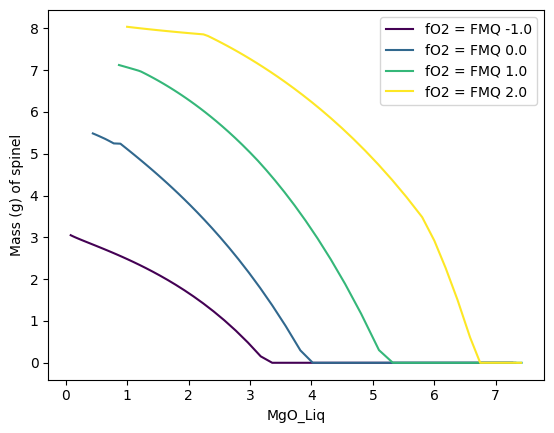

In [31]:
ptt.phase_mass_comparison(Results=Isobaric_Xtal_fo2, x_axis="MgO_Liq", cmap = "viridis", phase = "spinel1")

## Part 4 - Lets investigate phase stability as a function of water content

In [32]:
Aleutian = {'SiO2_Liq': 50.04,
       'TiO2_Liq': 0.81,
       'Al2O3_Liq': 15.01,
       'FeOt_Liq': 9.62,
       'MnO_Liq': 0.16,
       'MgO_Liq': 7.28,
       'CaO_Liq': 11.52,
       'Na2O_Liq': 2.54,
       'K2O_Liq': 0.30,
       'P2O5_Liq': 0.06}

Isobaric_Xtal_H2O = ptt.isobaric_crystallisation(Model = "MELTSv1.2.0",
                                           bulk = Aleutian,
                                           find_liquidus = True,
                                           P_bar = 2000,
                                           H2O_init=np.array([0.5, 2, 4]),
                                           T_end_C = 900,
                                           dt_C = 5,
                                           fO2_buffer = "FMQ",
                                           fO2_offset = 0,
                                           Frac_solid = True,
                                           Frac_fluid = False,
                                           label = "H2O_init",
                                           timeout=90)

Completed 100.0 %


## Lets make a harker plot

(<Figure size 960x900 with 9 Axes>,
 array([[<Axes: xlabel='MgO', ylabel='SiO$_2$'>,
         <Axes: xlabel='MgO', ylabel='TiO$_2$'>,
         <Axes: xlabel='MgO', ylabel='Al$_2$O$_3$'>],
        [<Axes: xlabel='MgO', ylabel='FeO$_t$'>,
         <Axes: xlabel='MgO', ylabel='CaO'>,
         <Axes: xlabel='MgO', ylabel='Na$_2$O'>],
        [<Axes: xlabel='MgO', ylabel='K$_2$O'>, <Axes: >, <Axes: >]],
       dtype=object))

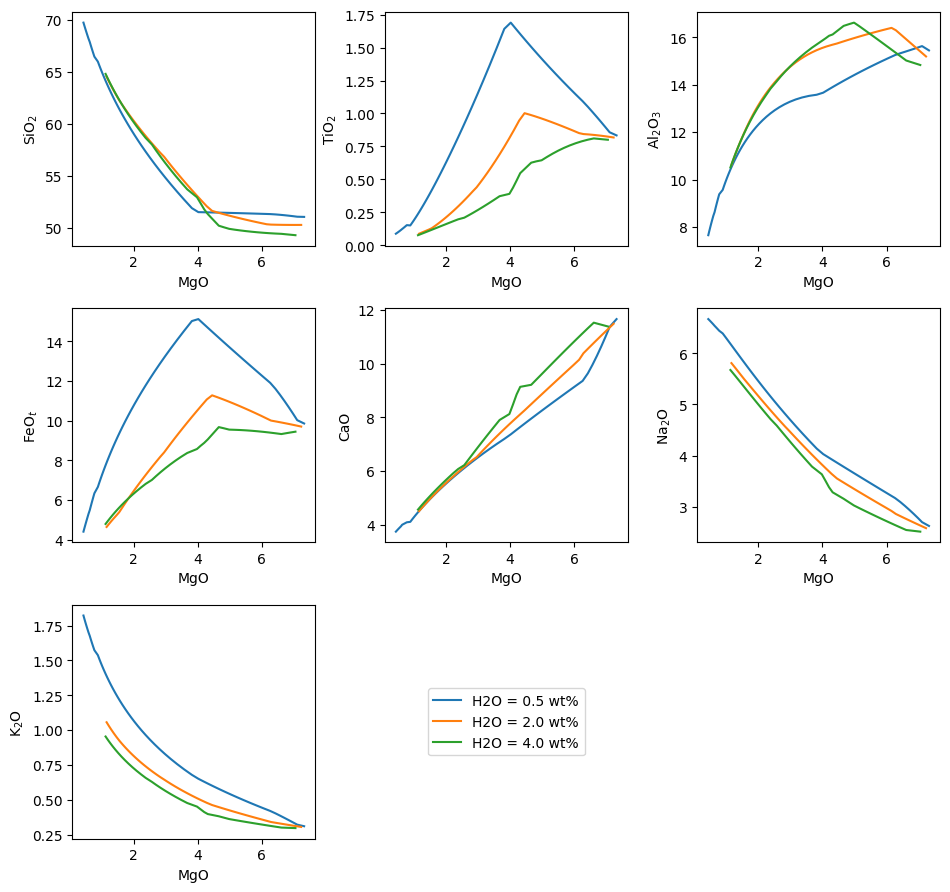

In [33]:
# Lets plot a Harker diagram of the results to compare
ptt.harker(Results = Isobaric_Xtal_H2O, legend = [1,2])

### And a phase abundance plot - adapting from the code above. 

### Make a plot for 
1) the amount of plagioclase 
2) the amount of spinel

### Lets plot these results on a TAS diagram

In [ ]:
# If you havent installed it ever, uncomment this line and install pyrolite. 
#%pip install pyrolite

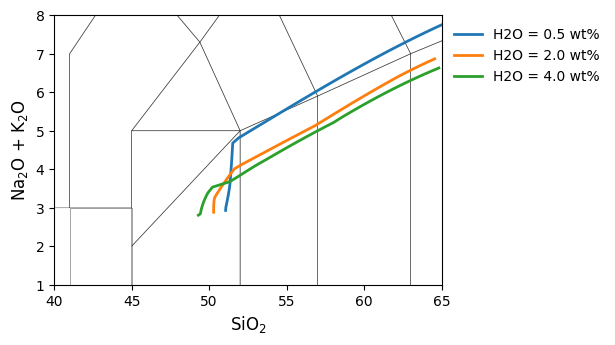

In [35]:
# ---- Create TAS diagram from pyrolite ----
from pyrolite.util.classification import TAS
cm = TAS()
f, a = plt.subplots(1,1, figsize=(5,3.5))
cm.add_to_axes(a,alpha=0.5,linewidth=0.5,
    zorder=-1,add_labels=False)

# ---- Loop through model results ----
for i in Isobaric_Xtal_H2O:
    df = Isobaric_Xtal_H2O[i]['All'].copy()
    df['Na2O+K2O']=df['Na2O_Liq']+df['K2O_Liq']
    a.plot(df['SiO2_Liq'],df['Na2O+K2O'], lw = 2,
        linestyle='-',alpha=1, label = i)



a.set_xlim([40, 65])
a.set_ylim([1, 8])
a.legend()
    

### Lets plot on a Miyashiro, 1974 esq diagram to look at Calc Alkaline vs. tholeiitic differentiation

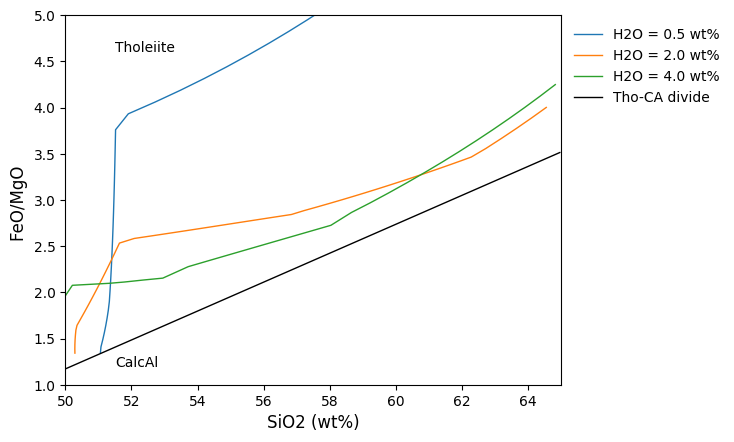

In [36]:
# Lets loop through the different keys and plot FeO vs MgO
x='SiO2_Liq'
y='FeO/MgO'
for key in Isobaric_Xtal_H2O.keys():
    # Lets add a column for FeO/MgO
    Isobaric_Xtal_H2O[key]['All']['FeO/MgO']=Isobaric_Xtal_H2O[key]['All']['FeOt_Liq']/Isobaric_Xtal_H2O[key]['All']['MgO_Liq']
    plt.plot(Isobaric_Xtal_H2O[key]['All'][x],Isobaric_Xtal_H2O[key]['All'][y],
         '-', label=key)
# Lets add approximate boundary from web plot digitizer!
plt.plot([45, 64.95495495495496],  [0.3876918668171161, 3.5129224652087476], '-k', label='Tho-CA divide')
plt.xlim([50, 65])
plt.ylim([1, 3])
plt.annotate('CalcAl', xy=[0.1, 0.05], xycoords="axes fraction", fontsize=10)
plt.annotate('Tholeiite', xy=[0.1, 0.9], xycoords="axes fraction", fontsize=10)
plt.ylim([1, 5])
plt.ylabel('FeO/MgO ')
plt.xlabel('SiO2 (wt%)')
plt.legend()

### Now do the same thing for the  Isobaric_Xtal_fo2 dataframe